In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('emissions.csv')

In [14]:
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [15]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [16]:
yearly_avg = df.groupby('year')['value'].mean().reset_index()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


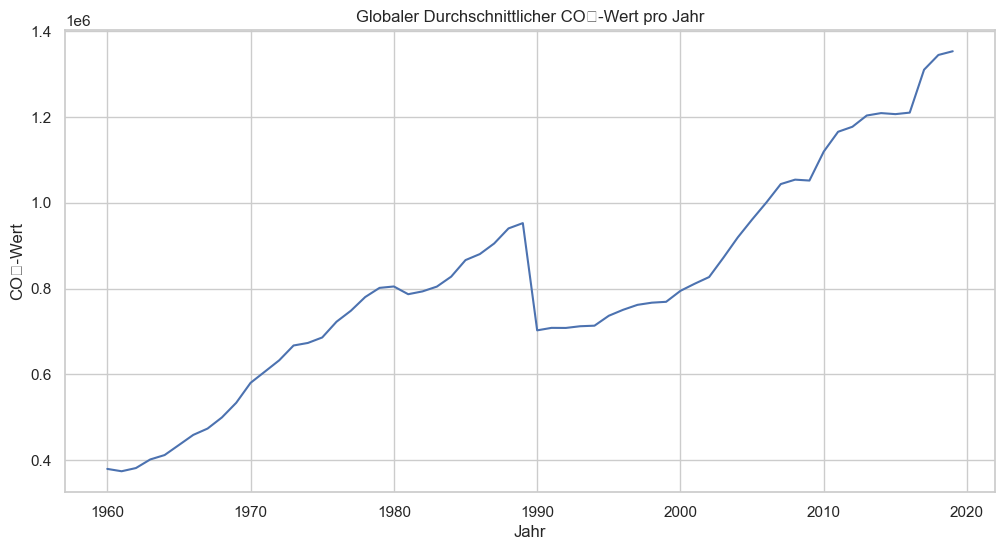

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_avg, x='year', y='value')
plt.title("Globaler Durchschnittlicher CO₂-Wert pro Jahr")
plt.ylabel("CO₂-Wert")
plt.xlabel("Jahr")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


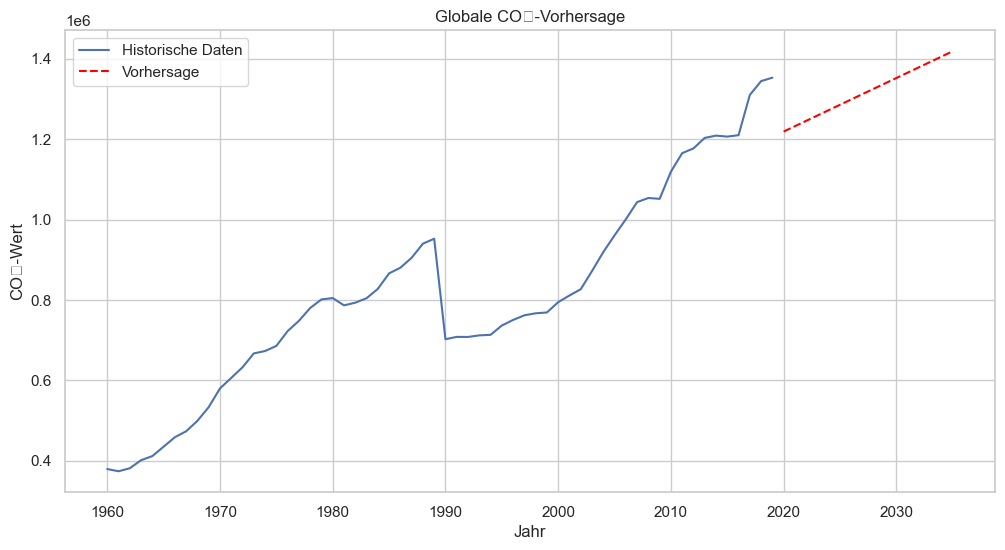

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = yearly_avg['year'].values.reshape(-1,1)
y = yearly_avg['value'].values

model = LinearRegression()
model.fit(X, y)

# Zukunft vorhersagen (z. B. bis 2035)
future_years = np.arange(df['year'].max() + 1, 2036).reshape(-1,1)
future_preds = model.predict(future_years)

# Visualisierung inkl. Zukunft
plt.figure(figsize=(12,6))
plt.plot(yearly_avg['year'], y, label="Historische Daten")
plt.plot(future_years, future_preds, linestyle='--', color='red', label="Vorhersage")
plt.xlabel("Jahr")
plt.ylabel("CO₂-Wert")
plt.title("Globale CO₂-Vorhersage")
plt.legend()
plt.show()